In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests

api_key = '439d4b804bc8187953eb36d2a8c26a02'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lat, long)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
url = "https://samples.openweathermap.org/data/2.5/box/city?bbox=12,32,15,37,10&appid=439d4b804bc8187953eb36d2a8c26a02"

In [4]:
url_response = requests.get(url)

In [5]:
print(url_response) 

<Response [200]>


In [6]:
response = url_response.json()
response
data_of_cities = []
check_count = 1
setter = 1
print(response)

{'cod': '200', 'calctime': 0.3107, 'cnt': 15, 'list': [{'id': 2208791, 'name': 'Yafran', 'coord': {'lon': 12.52859, 'lat': 32.06329}, 'main': {'temp': 9.68, 'temp_min': 9.681, 'temp_max': 9.681, 'pressure': 961.02, 'sea_level': 1036.82, 'grnd_level': 961.02, 'humidity': 85}, 'dt': 1485784982, 'wind': {'speed': 3.96, 'deg': 356.5}, 'rain': {'3h': 0.255}, 'clouds': {'all': 88}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}]}, {'id': 2208425, 'name': 'Zuwarah', 'coord': {'lon': 12.08199, 'lat': 32.931198}, 'main': {'temp': 15.36, 'temp_min': 15.356, 'temp_max': 15.356, 'pressure': 1036.81, 'sea_level': 1037.79, 'grnd_level': 1036.81, 'humidity': 89}, 'dt': 1485784982, 'wind': {'speed': 5.46, 'deg': 30.0002}, 'clouds': {'all': 56}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}]}, {'id': 2212771, 'name': 'Sabratah', 'coord': {'lon': 12.48845, 'lat': 32.79335}, 'main': {'temp': 15.31, 'temp_min': 15.306, 'temp_m

In [7]:
info = response["list"]
info_length = len(info)

In [8]:
info = response["list"]
for key in (info):
    ci_lat = key["coord"]["lat"]
    ci_lng = key["coord"]["lon"]
    max_temp = key["main"]["temp_max"]
    humidity = key["main"]["humidity"]
    clouds = key["clouds"]["all"]
    wind = key["wind"]["speed"]
    country = key["name"]
    date = key["dt"]
    data_of_cities.append({ "City": city,
                            "lat": ci_lat,
                            "lng": ci_lng,
                       "Max Temp": max_temp,
                       "Humidity": humidity,
                     "Cloudiness": clouds,
                     "Wind Speed": wind,
                        "Country": country,
                           "Date":date})
df = pd.DataFrame(data_of_cities)
new_df = df.set_index('Country')

In [9]:
new_df = df.set_index('Country')

In [10]:
new_df

,City,lat,lng,Max Temp in C,Humidity,Cloudiness,Wind Speed,Date
Country,,,,,,,,
Yafran,albany,32.063290,12.52859,9.681,85,88,3.96,1485784982
Zuwarah,albany,32.931198,12.08199,15.356,89,56,5.46,1485784982
Sabratah,albany,32.793350,12.48845,15.306,100,92,6.71,1485784982
Gharyan,albany,32.172218,13.02028,11.231,90,92,3.86,1485784982
Zawiya,albany,32.752220,12.72778,17.000,55,40,3.60,1485784982
Tripoli,albany,32.875191,13.18746,16.000,59,40,3.60,1485781822
Tarhuna,albany,32.435020,13.63320,17.000,55,40,3.60,1485784982
Masallatah,albany,32.616669,14.00000,12.856,73,88,4.81,1485784982
Al Khums,albany,32.648609,14.26191,15.181,73,88,5.26,1485784982


In [17]:
new_df
wind_df = new_df['Wind Speed']
humi = new_df['Humidity']
lat = new_df['lat']
temp = new_df["Max Temp"]
cloud = new_df["Cloudiness"]

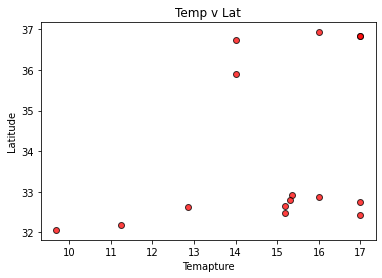

In [29]:

plt.scatter(temp, lat, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Temp v Lat")
plt.xlabel("Temapture")
plt.ylabel("Latitude")
plt.savefig("output_data/Fig1.png")

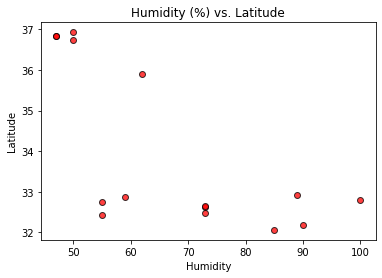

In [30]:
#Humidity (%) vs. Latitude
plt.scatter(humi, lat, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig("output_data/Fig2.png")

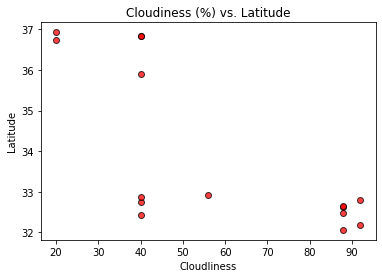

In [31]:
#Cloudiness (%) vs. Latitude
plt.scatter(cloud, lat, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudliness")
plt.ylabel("Latitude")
plt.savefig("output_data/Fig3.png")

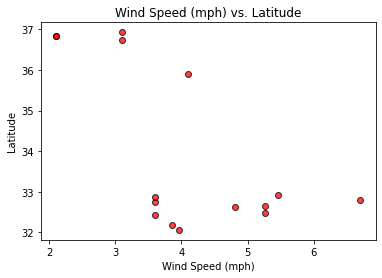

In [32]:
#Wind Speed (mph) vs. Latitude
plt.scatter(wind_df, lat, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.savefig("output_data/Fig4.png")

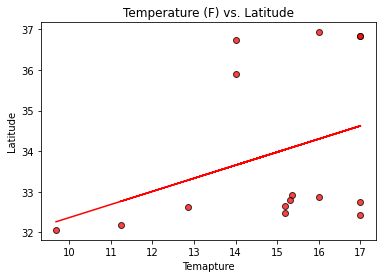

In [33]:
#Temperature (F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp, lat)
regress_values = temp * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp, lat)
plt.plot(temp,regress_values,"r-")
plt.scatter(temp, lat, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temapture")
plt.ylabel("Latitude")
plt.savefig("output_data/Fig5.png")

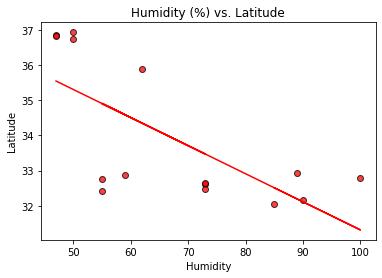

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(humi, lat)
regress_values = humi * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(humi, lat)
#regression
#Humidity (%) vs. Latitude
plt.plot(humi,regress_values,"r-")
plt.scatter(humi, lat, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig("output_data/Fig6.png")

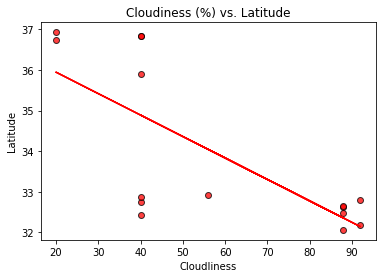

In [35]:
#Cloudiness (%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloud, lat)
regress_values = cloud * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloud, lat)
plt.plot(cloud,regress_values,"r-")
plt.scatter(cloud, lat, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudliness")
plt.ylabel("Latitude")
plt.savefig("output_data/Fig7.png")

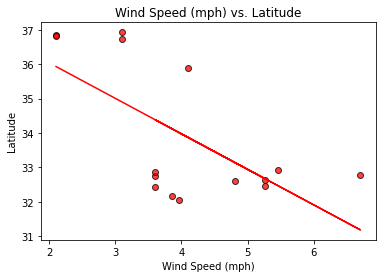

In [36]:
#Wind Speed (mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_df, lat)
regress_values = wind_df * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_df, lat)
plt.plot(wind_df,regress_values,"r-")
plt.scatter(wind_df, lat, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.savefig("output_data/Fig8.png")

In [28]:
new_df.to_csv(output_data_file, index_label="Country")